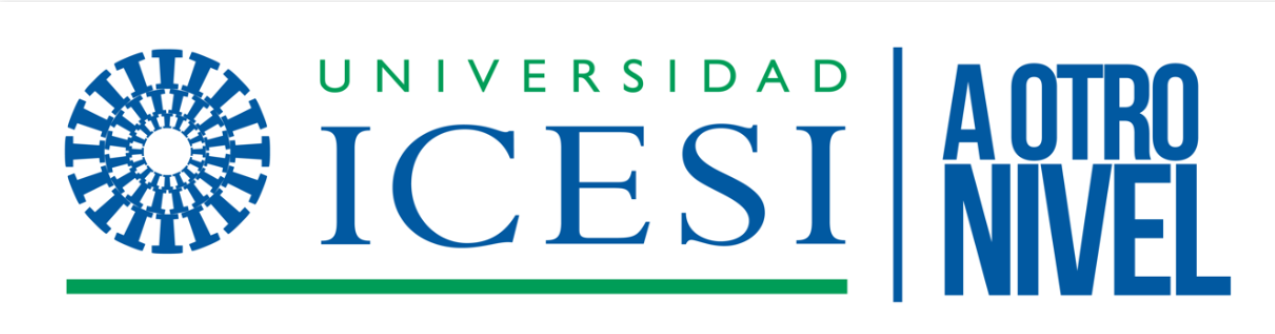

## SEBASTIAN BARRERA PEÑA              
-ANALISIS EXPLORATORIO DE DATOS
-  TALLER 1

##  ***1. Contexto del análisis***

El Covid-19 es un virus que el mundo conoció a finales del año 2019, este virus cuenta con una alta tasa de contagio y es letal en personas de avanzada edad o con personas que cuenten con alguna comorbilidad. 

Este virus obligó a los diferentes paises tomar diferentes medidas para evitar su propagación y minimizar las contagios, esto con el fin de evitar el colapso de los sistemas de salud, especialmente de las unidades de cuidados intensivos.

Este dataset, nos muestra cantidades de contagios, muertes y población de diferentes paises del mundo, esperamos poder analisar y evaluar cual ha sido el país mas afectado de acuerdo a su población y que países han sufrido en gran medida los estragos que ha dejado está enfermedad en la sociedad.

## ***2. Pregunta SMART***

¿De acuerdo a la población, en terminos de contagios y muertes, que países hacen parte del top 10 de estas dos variables de acuerdo a su población?

## **3. Descripción de los datos incluyendo para cada columna:**


* Serial Number... Consecutivo, puede funcionar como el ID del país **Cualitativa Ordinal**
* Country......... Nombre del país al cual pertenece cada fila de datos **Cualitativa Nominal**
* Total Cases..... Numero de contagios COVID-19 **Cuantitativa Discreta**
* Total Deaths.... Numero personas fallecidas **Cuantitativa Discreta**
* Total Recovered. Personas recuperadas **Cuantitativa Discreta**
* Active Cases.... Casos Activos **Cuantitativa Discreta**
* Total Test.....  Pruebas COVID realizadas **Cuantitativa Discreta**
* Population.....  Población de cada País **Cuantitativa Discreta**

## **4. Análisis general del dataset**

In [1]:
import pandas as pd   ## Libreria para manipular y analizar dato
import numpy as np  ## Libreria para operaciones numéricas
from scipy.stats import skew, kurtosis  ## funciones estadísticas
import plotly  ## Libreria para visualizaciones interactivas
import matplotlib.ticker as mtick  ## función para formatear en visualizaciones
import matplotlib.pyplot as plt  ## Libreria para visualizar
import seaborn as sns   ## Libreria para visualizar

In [2]:
## Cargamos el Dataset desde git hub

other_path = "https://raw.githubusercontent.com/Sebasbp94/EDA-COVID/main/covid_worldwide.csv"
df= pd.read_csv(other_path, sep=";")

df.head(5)

,Serial Number,Country,Total Cases,Total Deaths,Total Recovered,Active Cases,Total Test,Population
0,1,USA,"104,196,861","1,132,935","101,322,779","1,741,147","1,159,832,679","334,805,269"
1,2,India,"44,682,784","530,74","44,150,289","1,755","915,265,788","1,406,631,776"
2,3,France,"39,524,311","164,233","39,264,546","95,532","271,490,188","65,584,518"
3,4,Germany,"37,779,833","165,711","37,398,100","216,022","122,332,384","83,883,596"
4,5,Brazil,"36,824,580","697,074","35,919,372","208,134","63,776,166","215,353,593"


In [3]:
# Aquí revisamos el tipo de datos y las dimensiones de este Dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 231 entries, 0 to 230
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Serial Number    231 non-null    int64 
 1   Country          231 non-null    object
 2   Total Cases      231 non-null    object
 3   Total Deaths     225 non-null    object
 4   Total Recovered  210 non-null    object
 5   Active Cases     212 non-null    object
 6   Total Test       213 non-null    object
 7   Population       228 non-null    object
dtypes: int64(1), object(7)
memory usage: 14.6+ KB


**Análisis breve**
Aunque este dataset cuenta cuenta en su gran parte con variables cuantitativas, observamos que el tipo de variable que nos arroja es de tipo "Object", y esto se debe a que los números tienen unas comas que no permiten leerlos como un float, es decir son de tipo String... Para poder revisar estabase debemos quitar las comas y convertir a Float cadad columna

In [4]:
#Cambiamos el nombre de las columnas para un mejor entendimiento
df.columns = ["ID","PAIS","CASOS","MUERTES","RECUPERADOS", "CASOS_ACTIVOS","TOTAL_PRUEBAS","POBLACION"]

#Procedemos a eliminar las comas de cada una de las columnas y convertimos a float los strings

columns = ["ID","PAIS","CASOS","MUERTES","RECUPERADOS", "CASOS_ACTIVOS","TOTAL_PRUEBAS","POBLACION"]

df[columns] = df[columns].replace({',':''}, regex=True) #Código para elimianr las comas de cada columna

# bloque de código para cambiar el tipo de cada columna
df[["ID"]]=df[["ID"]].astype("str")
df[["CASOS"]]=df[["CASOS"]].astype("float")
df[["MUERTES"]]=df[["MUERTES"]].astype("float")
df[["RECUPERADOS"]]=df[["RECUPERADOS"]].astype("float")
df[["CASOS_ACTIVOS"]]=df[["CASOS_ACTIVOS"]].astype("float")
df[["TOTAL_PRUEBAS"]]=df[["TOTAL_PRUEBAS"]].astype("float")
df[["POBLACION"]]=df[["POBLACION"]].astype("float")

# Dividimos entre 1000 para manejar la información en miles y normalizar la información

df[["CASOS"]]=df[["CASOS"]]/1000
df[["MUERTES"]]=df[["MUERTES"]]/1000
df[["RECUPERADOS"]]=df[["RECUPERADOS"]]/1000
df[["CASOS_ACTIVOS"]]=df[["CASOS_ACTIVOS"]]/1000
df[["TOTAL_PRUEBAS"]]=df[["TOTAL_PRUEBAS"]]/1000
df[["POBLACION"]]=df[["POBLACION"]]/1000

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 231 entries, 0 to 230
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   ID             231 non-null    object 
 1   PAIS           231 non-null    object 
 2   CASOS          231 non-null    float64
 3   MUERTES        225 non-null    float64
 4   RECUPERADOS    210 non-null    float64
 5   CASOS_ACTIVOS  212 non-null    float64
 6   TOTAL_PRUEBAS  213 non-null    float64
 7   POBLACION      228 non-null    float64
dtypes: float64(6), object(2)
memory usage: 14.6+ KB


## **4. Análisis univariado**

In [5]:
df.isna().sum()
df.isna().sum()/len(df)*100

ID               0.000000
PAIS             0.000000
CASOS            0.000000
MUERTES          2.597403
RECUPERADOS      9.090909
CASOS_ACTIVOS    8.225108
TOTAL_PRUEBAS    7.792208
POBLACION        1.298701
dtype: float64

In [6]:
## Eliminamos las filas con Nan
df.dropna(subset=["ID"],axis=0,inplace=True)
df.dropna(subset=["TOTAL_PRUEBAS"],axis=0,inplace=True)
df.dropna(subset=["MUERTES"],axis=0,inplace=True)
df.dropna(subset=["TOTAL_PRUEBAS"],axis=0,inplace=True)
df.dropna(subset=["RECUPERADOS"],axis=0,inplace=True)
df.dropna(subset=["POBLACION"],axis=0,inplace=True)

df.drop(["CASOS_ACTIVOS"], axis = 'columns', inplace=True) #Esta columna no nos interesa para el analisis y se puede despejar rapidamente (Diferencia entre casos y recuperados)

df.isna().sum()

ID               0
PAIS             0
CASOS            0
MUERTES          0
RECUPERADOS      0
TOTAL_PRUEBAS    0
POBLACION        0
dtype: int64

In [7]:
#para las variables númericas revisamos sus principales estadísticas descriptivas 
df.describe()

,CASOS,MUERTES,RECUPERADOS,TOTAL_PRUEBAS,POBLACION
count,195.000000,195.000000,195.000000,1.950000e+02,1.950000e+02
mean,3319.974082,29.973672,3180.384287,3.374948e+04,3.206557e+04
std,10197.904042,106.668874,9851.367343,1.220401e+05,1.099843e+05
min,0.628000,0.001000,0.152000,2.540000e-01,1.523000e+00
25%,26.346500,0.308500,23.189000,3.621860e+02,1.100457e+03
50%,271.378000,2.233000,228.805000,2.610114e+03,6.844597e+03
75%,1723.625000,14.287000,1708.095000,1.477275e+04,2.782692e+04
max,104196.861000,1132.935000,101322.779000,1.159833e+06,1.406632e+06


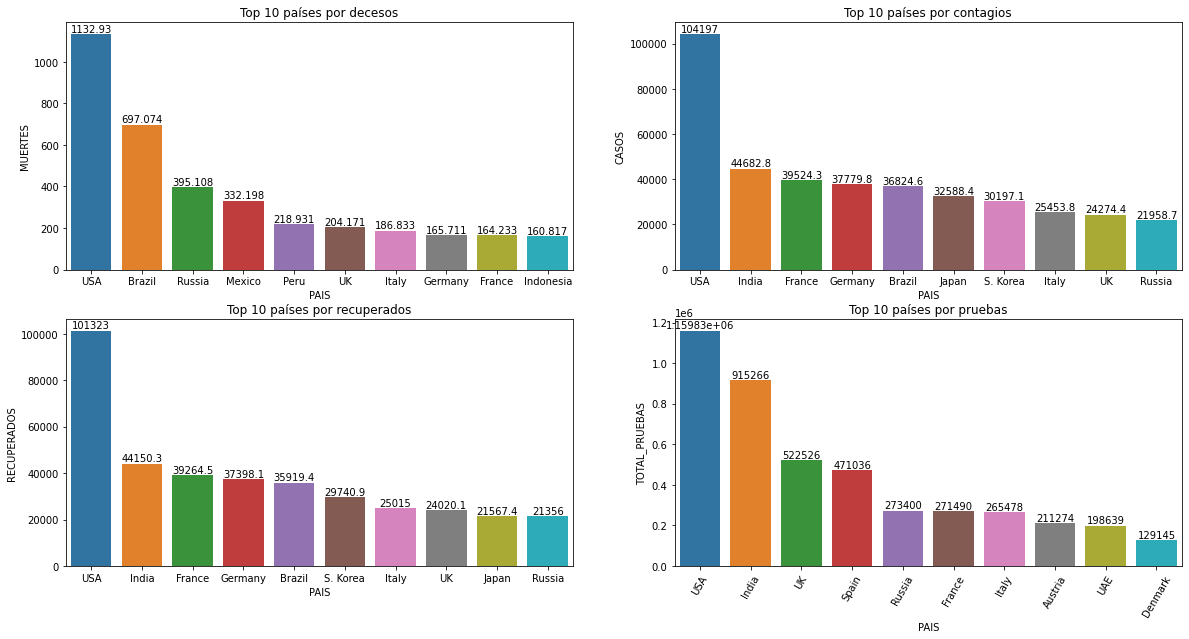

In [8]:
fig, axs = plt.subplots(figsize=[20, 10], ncols=2, nrows=2)

df1 = df[['PAIS', 'MUERTES']].groupby(['PAIS']).sum().reset_index().sort_values(by=["MUERTES"], ascending = False)[:10]
ax1=sns.barplot(x = "PAIS",y = 'MUERTES', data = df1, ax = axs[0,0])
ax1.set_title("Top 10 países por decesos")
ax1.bar_label(ax1.containers[0])
plt.xticks(rotation = 60)

df2 = df[['PAIS', 'CASOS']].groupby(['PAIS']).sum().reset_index().sort_values(by=["CASOS"], ascending = False)[:10]
ax2=sns.barplot(x = "PAIS",y = 'CASOS', data = df2, ax = axs[0,1])
ax2.set_title("Top 10 países por contagios")
ax2.bar_label(ax2.containers[0])
plt.xticks(rotation = 60)

df3 = df[['PAIS', 'RECUPERADOS']].groupby(['PAIS']).sum().reset_index().sort_values(by=["RECUPERADOS"], ascending = False)[:10]
ax3=sns.barplot(x = "PAIS",y = 'RECUPERADOS', data = df3, ax = axs[1,0])
ax3.set_title("Top 10 países por recuperados")
ax3.bar_label(ax3.containers[0])
plt.xticks(rotation = 60)

df4 = df[['PAIS', 'TOTAL_PRUEBAS']].groupby(['PAIS']).sum().reset_index().sort_values(by=["TOTAL_PRUEBAS"], ascending = False)[:10]
ax4=sns.barplot(x = "PAIS",y = 'TOTAL_PRUEBAS', data = df4, ax = axs[1,1])
ax4.set_title("Top 10 países por pruebas")
ax4.bar_label(ax4.containers[0])
plt.xticks(rotation = 60)


plt.show()


In [9]:
# Agregamos los indices de muertes y casos de Covid 19

df["IND_MUERTES"]=round((df["MUERTES"]/df["POBLACION"])*1000,0)
df["DEC_CONTAGIOS"]=round((df["MUERTES"]/df["CASOS"])*1000,0)

df.head(5)

,ID,PAIS,CASOS,MUERTES,RECUPERADOS,TOTAL_PRUEBAS,POBLACION,IND_MUERTES,DEC_CONTAGIOS
0,1,USA,104196.861,1132.935,101322.779,1159832.679,334805.269,3.0,11.0
1,2,India,44682.784,53.074,44150.289,915265.788,1406631.776,0.0,1.0
2,3,France,39524.311,164.233,39264.546,271490.188,65584.518,3.0,4.0
3,4,Germany,37779.833,165.711,37398.100,122332.384,83883.596,2.0,4.0
4,5,Brazil,36824.580,697.074,35919.372,63776.166,215353.593,3.0,19.0


**Analisis** Entonces, pareciera que Estados unidos fuera el país mas afectado por la pandemia en termino de muertes y contagios, pero lo importante es hacer el analisis en temrino de población, ya que ese país tiene mas de 300 muillones de habitantes.

In [10]:
df = df.sort_values(by=['IND_MUERTES'], ascending=False)

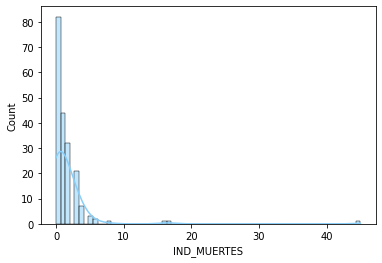

<Figure size 720x720 with 0 Axes>

In [11]:
sns.histplot(x=df["IND_MUERTES"],kde=True,color="lightskyblue")
plt.figure(figsize=(10, 10))

plt.show()

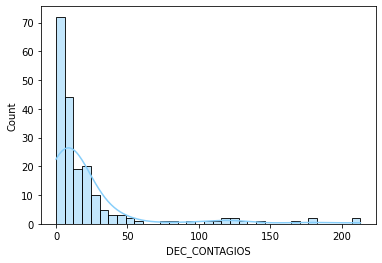

<Figure size 720x720 with 0 Axes>

In [12]:
sns.histplot(x=df["DEC_CONTAGIOS"],kde=True,color="lightskyblue")
plt.figure(figsize=(10, 10))

plt.show()

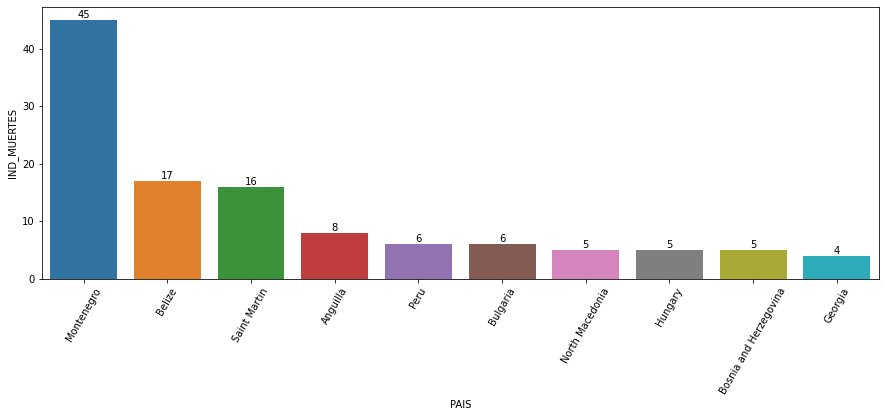

In [15]:
df1 = df[['PAIS', 'IND_MUERTES', 'CASOS']].groupby(['PAIS']).sum().reset_index().sort_values(by=["IND_MUERTES"], ascending = False)[:10]

fig, ax1 = plt.subplots(figsize=(15, 5))
sns.barplot(x = "PAIS",y = 'IND_MUERTES', data = df1, ax=ax1)

ax1.set_xticklabels(ax1.get_xticklabels(), rotation=60)
ax1.bar_label(ax1.containers[0])

ax1.set_xticklabels(ax1.get_xticklabels(), rotation=60)

plt.show()

En este gráfico, podemos observar la cantidad de decesos por cada 1000 habitantes de un país, y se observa que Montenegro ha sido el país mas afectado en estos terminos, en donde se observa que por cada mil habitantes 45 fallecian a causa de la enfermedad.

In [16]:
df = df.sort_values(by=['DEC_CONTAGIOS'], ascending=False)
df.head(10)

,ID,PAIS,CASOS,MUERTES,RECUPERADOS,TOTAL_PRUEBAS,POBLACION,IND_MUERTES,DEC_CONTAGIOS
122,123,Uganda,1.704,0.363,100.431,3012.408,48432.863,0.0,213.0
163,164,Lesotho,3.479,0.723,2.598,431.221,2175.699,0.0,208.0
196,197,Yemen,11.945,2.159,9.124,329.592,31154.867,0.0,181.0
140,141,Guyana,7.295,1.294,71.357,717.867,794.045,2.0,177.0
99,100,Kenya,34.281,5.688,33.704,3967.062,56215.221,0.0,166.0
153,154,Papua New Guinea,4.675,0.670,43.982,249.149,9292.169,0.0,143.0
142,143,Fiji,6.882,0.883,6.678,667.715,909.466,1.0,128.0
212,213,Sao Tome and Principe,0.628,0.077,6.202,29.036,227.679,0.0,123.0
160,161,Guinea,3.824,0.467,37.757,660.107,13865.691,0.0,122.0
179,180,Grenada,1.968,0.238,19.358,182.981,113.475,2.0,121.0


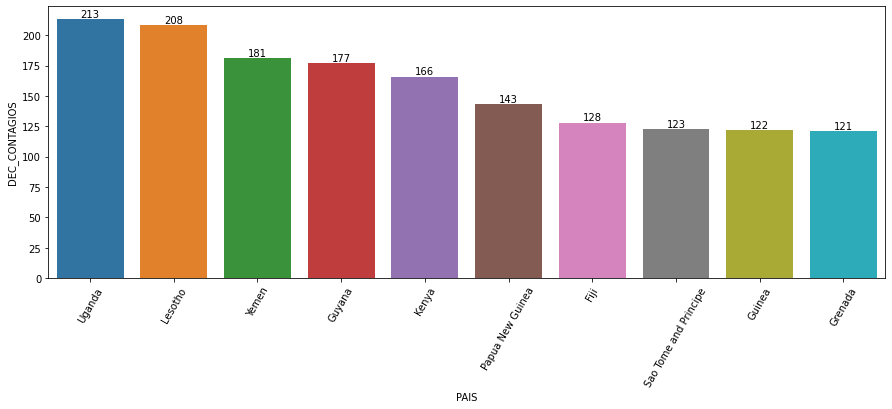

In [17]:
df2 = df[['PAIS', 'DEC_CONTAGIOS', 'CASOS']].groupby(['PAIS']).sum().reset_index().sort_values(by=["DEC_CONTAGIOS"], ascending = False)[:10]

fig, ax1 = plt.subplots(figsize=(15, 5))
sns.barplot(x = "PAIS",y = 'DEC_CONTAGIOS', data = df2, ax=ax1)
ax1.bar_label(ax1.containers[0])

ax1.set_xticklabels(ax1.get_xticklabels(), rotation=60)

plt.show()

# **CONCLUSIONES** 
En este Dataset, con información del Covid al cierre del 2022, podemos observar que en terminos de decesos por la enfermedad, Uganda fue el país mas afectado, presentando una cantidad de 213 decesos por cada 1000 personas que se contagiaron por la enfermedad. Más sin embargo, sería bueno encontrar un DataSet con mas detalle en la información, por ejemplo (Meses, genero, ciudad, capasidad hospitalaria... etc) ya que esto nos ayudaría a complementar el analisis, porque en este momento no tenemos información que nos diga por ejemplo, como eran esas 213 personas que murieron a causa del covid en Uganda.